In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split  
import time
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, recall_score, precision_score, f1_score, roc_auc_score

In [2]:
df = pd.read_csv('../dataset/dataset_jadi.csv')
df

,text,score,label
0,keren sangat mudah lihat pulsa tau kuota,2,positif
1,mantap,1,positif
2,bismillah baik,2,positif
3,terima kasih telkomsel hari gue promo kuota gb...,2,positif
4,mantap,1,positif
...,...,...,...
4591,sangat bantu,1,positif
4592,mantap,1,positif
4593,baik,1,positif
4594,baik mohon lebih banyak promo potong harga,2,positif


In [3]:
x = df['text']
y = df['label']

In [4]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(["positif", "negatif"])

y = le.transform(df['label'].values)

In [5]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidfconverter = TfidfVectorizer(max_features=2000, min_df=5, max_df=0.7, ngram_range=(1,3))
X1 = tfidfconverter.fit_transform(x).toarray()

In [6]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE(k_neighbors=5)
X_smote, Y_smote = oversample.fit_resample(X1, y)

In [7]:
from collections import Counter

counter = Counter(Y_smote)
print(counter)

Counter({1: 4417, 0: 4417})


In [8]:
data = {
    'label' : Y_smote
}
y_plot = pd.DataFrame(data)

(array([0, 1]), [Text(0, 0, '0'), Text(1, 0, '1')])

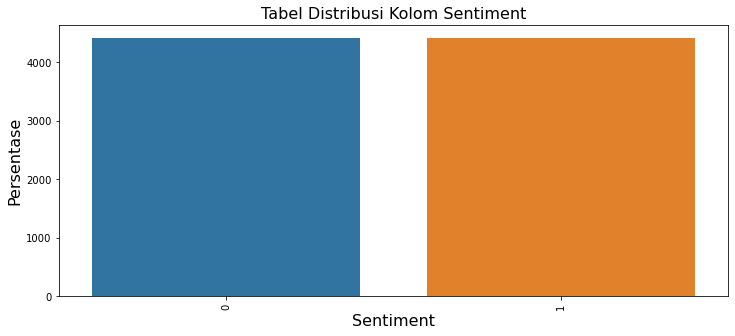

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(x='label', data=y_plot)
plt.title('Tabel Distribusi Kolom Sentiment', fontsize=16)
plt.ylabel('Persentase', fontsize=16)
plt.xlabel('Sentiment', fontsize=16)
plt.xticks(rotation='vertical')

# Dataset 70vs30

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.30, random_state=0)

In [28]:
text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [29]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

In [30]:
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))

EN Training time: 1.997488s; Prediction time: 0.125878s


In [31]:
print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")

Random Forest
Accuracy  =  96.91 %
Precision =  96.58 %
Recall    =  97.31 %
F1-Score  =  96.94 %
ROC AUC   =  0.9690364518112065



In [15]:
# Random Forest
# Input text
review = "saya suka sekali aplikasi ini, sangat mendukung saya"

review_vector = tfidfconverter.transform([review]).toarray() # vectorizing
pred_text = text_classifier_en.predict(review_vector)
pred_text = le.inverse_transform(pred_text)
print(pred_text)

['positif']


# Dataset 75vs25

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.25, random_state=0)

In [33]:
text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [34]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

In [35]:
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))

EN Training time: 2.343774s; Prediction time: 1.800335s


In [36]:
print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")

Random Forest
Accuracy  =  97.1 %
Precision =  96.95 %
Recall    =  97.3 %
F1-Score  =  97.12 %
ROC AUC   =  0.9710178786611908



# Dataset 80vs20

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.20, random_state=0)

In [39]:
text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [40]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

In [41]:
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))

EN Training time: 2.575825s; Prediction time: 1.135766s


In [42]:
print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")

Random Forest
Accuracy  =  96.83 %
Precision =  96.75 %
Recall    =  96.97 %
F1-Score  =  96.86 %
ROC AUC   =  0.9682959734329598



# Dataset 85vs15

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.15, random_state=0)

In [44]:
text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [45]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

In [46]:
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))

EN Training time: 2.856612s; Prediction time: 0.920384s


In [47]:
print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")

Random Forest
Accuracy  =  97.44 %
Precision =  96.9 %
Recall    =  98.06 %
F1-Score  =  97.48 %
ROC AUC   =  0.974292409901711



# Dataset 90vs10

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X_smote, Y_smote, test_size=0.1, random_state=0)

In [49]:
text_classifier_en = RandomForestClassifier(n_estimators=100, random_state=0)
t0_en = time.time()
text_classifier_en.fit(X_train, y_train)
t1_en = time.time()

In [50]:
predictions_en = text_classifier_en.predict(X_test)
t2_en = time.time()
time_linear_train_en = t1_en-t0_en
time_linear_predict_en = t2_en-t1_en

In [51]:
print("EN Training time: %fs; Prediction time: %fs" % (time_linear_train_en, time_linear_predict_en))

EN Training time: 2.973757s; Prediction time: 3.329055s


In [52]:
print("Random Forest")
print('Accuracy  = ', round(accuracy_score(y_test, predictions_en)*100,2),'%')
print('Precision = ', round(precision_score(y_test, predictions_en)*100,2),'%')
print('Recall    = ', round(recall_score(y_test, predictions_en)*100,2),'%')
print('F1-Score  = ', round(f1_score(y_test, predictions_en)*100,2),'%')
print('ROC AUC   = ', roc_auc_score(y_test, predictions_en))
print("")

Random Forest
Accuracy  =  97.29 %
Precision =  96.4 %
Recall    =  98.48 %
F1-Score  =  97.43 %
ROC AUC   =  0.9722820623294556

